In [1]:
import numpy as np
from scipy import integrate
import scipy.optimize as opt
from matplotlib import pyplot as plt
import scipy.stats as scs

In [2]:
#Definindo as Constantes

c = 3 * (10 ** 5)
#H_0 = 0

In [3]:
u_list = np.array([34.117469999999997, 34.082340000000002, 34.070259999999998, 34.404829999999997, 34.128639999999997, 34.451230000000002, 34.318800000000003, 34.215560000000004, 34.161239999999999, 34.488590000000002, 34.575380000000003, 34.493369999999999, 34.940350000000002, 35.145130000000002, 35.249839999999999, 35.227229999999999, 34.93018, 35.191389999999998, 35.352319999999999, 35.34151, 35.56503, 35.14931, 35.994030000000002, 35.821800000000003, 35.558, 35.531300000000002, 35.78839, 35.836199999999998, 36.112879999999997, 36.28389, 36.275149999999996, 36.727640000000001, 36.382930000000002, 36.82694, 36.631860000000003, 36.793500000000002, 36.60604, 37.540019999999998, 37.603360000000002, 37.641710000000003, 37.464709999999997, 38.12106, 38.43656, 38.88447, 40.570869999999999, 40.682099999999998, 40.730200000000004, 40.998739999999998, 40.945410000000003, 41.25853, 41.322809999999997, 41.36636, 41.440710000000003, 41.473939999999999, 41.48489, 41.48789, 41.771929999999998, 41.775739999999999, 41.86542, 42.037439999999997, 42.030110000000001, 42.08907, 42.267910000000001, 42.17991, 42.428370000000001, 42.439010000000003, 42.643340000000002, 42.591529999999999, 42.824269999999999, 42.486130000000003, 42.461010000000002, 42.51052, 42.46461, 42.760820000000002, 42.880760000000002, 42.561369999999997, 42.514989999999997, 42.79513, 42.960189999999997, 43.02993, 42.745910000000002, 43.13241, 43.022689999999997, 43.397129999999997, 43.0456, 43.143700000000003, 43.022579999999998, 43.236460000000001, 43.17559, 43.208649999999999, 43.28689, 43.426960000000001, 43.169130000000003, 43.452640000000002, 43.353000000000002, 43.489539999999998, 43.691070000000003, 43.94979, 43.651919999999997, 43.531529999999997, 43.543680000000002, 44.41386, 43.474789999999999, 43.870280000000001, 44.094340000000003, 43.707729999999998, 44.258890000000001, 44.552239999999998, 44.429130000000001, 43.506959999999999, 43.953150000000001, 43.62209, 43.999270000000003, 43.940669999999997, 44.672240000000002])
sigma_list = np.array([0.19292000000000001, 0.19033, 0.19617999999999999, 0.18698999999999999, 0.18648000000000001, 0.18865000000000001, 0.18634999999999999, 0.18315999999999999, 0.18215000000000001, 0.18018999999999999, 0.17867, 0.17172999999999999, 0.16571, 0.16145999999999999, 0.16600999999999999, 0.16137000000000001, 0.15934000000000001, 0.15994, 0.16148999999999999, 0.15581999999999999, 0.19253999999999999, 0.15323999999999999, 0.15362000000000001, 0.24753, 0.15085999999999999, 0.15947, 0.15057999999999999, 0.14807999999999999, 0.14657999999999999, 0.14294999999999999, 0.14374000000000001, 0.14305999999999999, 0.14054, 0.14433000000000001, 0.13855999999999999, 0.13921, 0.14169999999999999, 0.13900000000000001, 0.1394, 0.14005999999999999, 0.13743, 0.13893, 0.14224999999999999, 0.14007, 0.13249, 0.13172, 0.13195000000000001, 0.13503999999999999, 0.13167999999999999, 0.13138, 0.13161999999999999, 0.13266, 0.13228999999999999, 0.13173000000000001, 0.13203000000000001, 0.13446, 0.13369, 0.13657, 0.13833000000000001, 0.13447000000000001, 0.14319000000000001, 0.13549, 0.13478999999999999, 0.13639999999999999, 0.13677, 0.14183999999999999, 0.14221, 0.15515000000000001, 0.15376000000000001, 0.14235999999999999, 0.13555, 0.13421, 0.14868999999999999, 0.13919000000000001, 0.14176, 0.15886, 0.13417999999999999, 0.13671, 0.14465, 0.14410000000000001, 0.13569000000000001, 0.14562, 0.14354, 0.15769, 0.14005000000000001, 0.18895999999999999, 0.15690000000000001, 0.18373, 0.15179999999999999, 0.16864999999999999, 0.15110000000000001, 0.17566000000000001, 0.15923999999999999, 0.14326, 0.15151000000000001, 0.15898000000000001, 0.32857999999999998, 0.29466999999999999, 0.28556999999999999, 0.33106999999999998, 0.25391999999999998, 0.37047000000000002, 0.22628999999999999, 0.36829000000000001, 0.32807999999999998, 0.28938999999999998, 0.36984, 0.40148, 0.44995000000000002, 0.30181999999999998, 0.29831000000000002, 0.26844000000000001, 0.31807000000000002, 0.51326000000000005, 0.54895000000000005])
z_list = np.array([0.015429999999999999, 0.015879999999999998, 0.016150000000000001, 0.016310000000000002, 0.016449999999999999, 0.01661, 0.016830000000000001, 0.01721, 0.017340000000000001, 0.017649999999999999, 0.01814, 0.01983, 0.021839999999999998, 0.023230000000000001, 0.02351, 0.024160000000000001, 0.024559999999999998, 0.024819999999999998, 0.025940000000000001, 0.02605, 0.02632, 0.027900000000000001, 0.029610000000000001, 0.030130000000000001, 0.03057, 0.030630000000000001, 0.031559999999999998, 0.034799999999999998, 0.036490000000000002, 0.039280000000000002, 0.042909999999999997, 0.04512, 0.048759999999999998, 0.050099999999999999, 0.050220000000000001, 0.052979999999999999, 0.053710000000000001, 0.06336, 0.070760000000000003, 0.074789999999999995, 0.078850000000000003, 0.087760000000000005, 0.10083, 0.12470000000000001, 0.24859999999999999, 0.26300000000000001, 0.28499999999999998, 0.29120000000000001, 0.33100000000000002, 0.33729999999999999, 0.3402, 0.34599999999999997, 0.35699999999999998, 0.35780000000000001, 0.36899999999999999, 0.37090000000000001, 0.41499999999999998, 0.42999999999999999, 0.44900000000000001, 0.45100000000000001, 0.4607, 0.4627, 0.46999999999999997, 0.496, 0.50429999999999997, 0.52100000000000002, 0.52600000000000002, 0.53200000000000003, 0.54800000000000004, 0.55000000000000004, 0.55159999999999998, 0.55700000000000005, 0.57099999999999995, 0.58099999999999996, 0.58169999999999999, 0.59199999999999997, 0.60399999999999998, 0.60999999999999999, 0.61299999999999999, 0.62, 0.62680000000000002, 0.63300000000000001, 0.64300000000000002, 0.67900000000000005, 0.68799999999999994, 0.69099999999999995, 0.69499999999999995, 0.70699999999999996, 0.70999999999999996, 0.72099999999999997, 0.72999999999999998, 0.74099999999999999, 0.752, 0.75600000000000001, 0.79100000000000004, 0.80000000000000004, 0.81000000000000005, 0.81100000000000005, 0.81699999999999995, 0.81799999999999995, 0.82179999999999997, 0.82999999999999996, 0.83999999999999997, 0.86799999999999999, 0.87, 0.90500000000000003, 0.91000000000000003, 0.92710000000000004, 0.93000000000000005, 0.94899999999999995, 0.94999999999999996, 0.95999999999999996, 0.96099999999999997, 0.98299999999999998, 1.01])

In [19]:
#Adoto t como variável muda

# Ω_Λ0 = Ω[0]
# Ω_k0 = Ω[1]
# Ω_m0 = Ω[2]
# Ω_r0 = Ω[3]

def E(Ω, z):
    t0 = 1 + np.array(z)
    E = Ω[0] + Ω[1] * (t0**2) + Ω[2] * (t0**3) + Ω[3] * (t0**4)
    return E ** (0.5)


def integral(y,a,b):
    t0 = integrate.quad(lambda x: y(x), a, b)
    return t0[0]

def D_c(Ω, z):
    def a(z):
        b = E(Ω,z)
        return 1/b
    
    lista = []
    for i in range(np.size(z)):
        d = integral(a,0,z[i])            
        lista.append(d)
    return np.array(lista)

def D_t(Ω, z):
    t0 = np.sqrt(np.sqrt(Ω[1]**2))           # Tirei o módulo pois estava tendo problemas com valores negativos
#    t0 = np.sqrt(Ω[1])
#    t0 = (Ω[1]) ** (0.5)
    if t0 == 0: 
        t1 = D_c(Ω,z)
    else:
        t1 = (np.sinh(t0 * D_c(Ω, z)))/t0
    return t1

def D_L(Ω, z):
    return (1+z) * D_t(Ω, z)

def 𝜇(Ω, z, H0):
    t0 = D_L(Ω, z)
    return (5 * np.log10(t0)) + 25 + (5 * np.log10(c/H0)) 

def likelihood_ln(z, μo, σ, H0, Ω):
    μt = 𝜇(Ω, z, H0)  #μ teórico
    arg = ((μt-μo)/σ) ** 2
    return np.sum(arg)

In [5]:
#Ω_best = [0.7,4,0.3,0]
#x = np.linspace(0,100, 1000)
#z = D_t(Ω_best,x)
#plt.plot(x,z)

# Questão 1

# Cálculo do Best Fit

Vamos inicialmente definir uma Likelihood para ser modelada com 3 parâmetros livres: $H_0$, $\Omega_\Lambda$ e $\Omega_{m0}$

In [6]:
def model_likelihood(model):
    t0 = likelihood_ln(z_list,u_list,sigma_list,model[0],[model[1],0,model[2],0])
    return t0
    

x0 = np.array([70, 0.73, 0.27])   #chute inicial
limites = ((0.1, None), (0, 1.0), (0, 1.0)) 
t0 = opt.minimize(model_likelihood, x0, bounds = limites, method='Nelder-Mead', tol=1e-6)
t1 = t0.x
t1

# Aqui estão os valores de best fit
# O primeiro é H0, o segundo Ω_Λ0 e o terceiro Ω_m0

/home/ricardo/anaconda3/lib/python3.8/site-packages/scipy/optimize/_minimize.py:535: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,


array([69.68452706,  0.74561483,  0.26529616])

Agora vamos definir uma Likelihood com todos os parâmetros à serem modelados

In [7]:
def model_likelihood_geral(model):
    t0 = likelihood_ln(z_list,u_list,sigma_list,model[0],model[1:])
    return t0

x0g = np.array([70, 0.73, 0.02, 0.27, 1e-05])
limitesg = ((0, None), (0, 1.0), (0, 1.0), (0, 1.0), (0, 1.0))
t0g = opt.minimize(model_likelihood_geral, x0g, bounds=limitesg, method='Nelder-Mead', tol=1e-6)

t1g = t0g.x
t1g

array([ 6.95453623e+01,  7.48622464e-01, -6.70668601e-11,  2.66310933e-01,
        2.86421725e-05])

# Teste da razão das Likelihoods

In [16]:
λ = model_likelihood(t1) / model_likelihood_geral(t1g)

print(λ)



1.0000004195011825


# Encontrando a Matriz de Fischer

In [24]:
# Vamos inicialmente definir as derivadas da likelihood em relação aos diferentes parâmetros 

def func(Ω,z):
    t1 = (-1/2) * ((1+z) ** 3) / ((Ω[0] + Ω[2] * (1 + z)**3)**(3/2))
    return t1

def d_H0(H0):
    return -5 * (1/H0)

def d_ΩΛ(z,H0,c,Ω):
    return 5 * (1 / E(Ω, z)) * D_c(Ω,z)

def d_Ωm(z,H0,c,Ω):
    return 5 * (1 / E(Ω, z)) * func(Ω, z)

In [25]:
H0b = t1g[0]
Ωb = t1g[1:]

d1 = d_H0(H0b)
d2 = d_Ωm(z_list, H0b, c, Ωb)
d3 = d_ΩΛ(z_list, H0b, c, Ωb)


d = [d1,d2,d3]

matrix = np.zeros((3,3))
for i in range(3):
    for j in range(3):
        matrix[i][j] = np.sum( (1/(sigma_list)**2)*d[i]*d[j] )

print(matrix)

[[ 2.33345152e+01  9.19916278e+02 -3.71901626e+02]
 [ 9.19916278e+02  3.65478930e+04 -1.53246586e+04]
 [-3.71901626e+02 -1.53246586e+04  8.83535605e+03]]


# Encontrando as regiões de confiança

In [9]:
#Valor do Chi² para sigma 1, 2 e 3 correspondendo respectivamente a alpha = 0,3173 | 0,045 | 0,0027  e l = 2
x2_0 = [scs.chi2.ppf(0.6827,2), scs.chi2.ppf(0.955,2), scs.chi2.ppf(0.9973,2)]
x2_0

[2.2958151607859736, 6.202185578423633, 11.82900701194368]

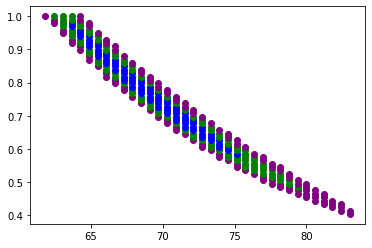

In [10]:

# Para encontrar a região
# mantemos fixo um dos parâmetros (sendo o valor fixo o best fit) e variamos os outros dois

# Primeiro vamos começar variando o H_0 e Omega_lambda e mantendo Omega_m0 com o valor 0.26529616

lik_bestfit = likelihood_ln(z_list, u_list, sigma_list, 69.68452706, [0.74561483,0,0.26529616,0])
H_0 = np.linspace(40,100,100)
Omega_lambda= np.linspace(0,1.0,100)

for i in range(np.size(H_0)):
    for j in range(np.size(Omega_lambda)):
        lik_aleat = likelihood_ln(z_list, u_list, sigma_list, H_0[i], [Omega_lambda[j],0,0.26529616,0])
        try:
            lambda_f0 =  lik_aleat - lik_bestfit
            if lambda_f0 < x2_0[0]:    # 3 sigmas
                plt.scatter(H_0[i],Omega_lambda[j], c='blue')
            elif lambda_f0 > x2_0[0] and lambda_f0 < x2_0[1]:   # 2 sigmas
                plt.scatter(H_0[i],Omega_lambda[j], c='green')
            elif lambda_f0 > x2_0[1] and lambda_f0 < x2_0[2]: # 1 sigma
                plt.scatter(H_0[i],Omega_lambda[j], c='purple')

        except ValueError:
            pass
plt.show()


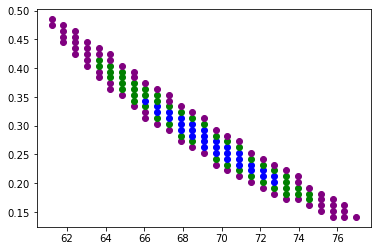

In [11]:
# Agora vamos variar H_0 e Omega_m0 mantendo Omega_lambda com o valor 0.74561483

lik_bestfit = likelihood_ln(z_list, u_list, sigma_list, 69.68452706, [0.74561483,0,0.26529616,0])
H_0 = np.linspace(40,100,100)
Omega_m0= np.linspace(0,1.0,100)

for i in range(np.size(H_0)):
    for j in range(np.size(Omega_m0)):
        lik_aleat = likelihood_ln(z_list, u_list, sigma_list, H_0[i], [0.74561483,0,Omega_m0[j],0])
        try:
            lambda_f0 =  lik_aleat - lik_bestfit
            if lambda_f0 < x2_0[0]:    # 3 sigmas
                plt.scatter(H_0[i],Omega_m0[j], c='blue')
            elif lambda_f0 > x2_0[0] and lambda_f0 < x2_0[1]:   # 2 sigmas
                plt.scatter(H_0[i],Omega_m0[j], c='green')
            elif lambda_f0 > x2_0[1] and lambda_f0 < x2_0[2]: # 1 sigma
                plt.scatter(H_0[i],Omega_m0[j], c='purple')

        except ValueError:
            pass
plt.show()

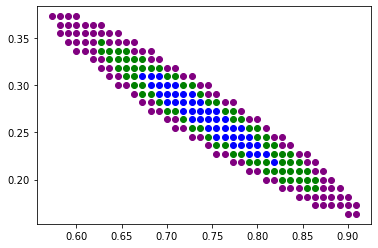

In [15]:
# Agora vamos variar Omega_lambda e Omega_m0 mantendo H_0 com o valor 69.68452706

lik_bestfit = likelihood_ln(z_list, u_list, sigma_list, 69.68452706, [0.74561483,0,0.26529616,0])
Omega_lambda= np.linspace(0.1,1.0,100)
Omega_m0= np.linspace(0.1,1.0,100)

for i in range(np.size(Omega_lambda)):
    for j in range(np.size(Omega_m0)):
        lik_aleat = likelihood_ln(z_list, u_list, sigma_list, 69.68452706, [Omega_lambda[i],0,Omega_m0[j],0])
        try:
            lambda_f0 =  lik_aleat - lik_bestfit
            if lambda_f0 < x2_0[0]:    # 3 sigmas
                plt.scatter(Omega_lambda[i],Omega_m0[j], c='blue')
            elif lambda_f0 > x2_0[0] and lambda_f0 < x2_0[1]:   # 2 sigmas
                plt.scatter(Omega_lambda[i],Omega_m0[j], c='green')
            elif lambda_f0 > x2_0[1] and lambda_f0 < x2_0[2]: # 1 sigma
                plt.scatter(Omega_lambda[i],Omega_m0[j], c='purple')

        except ValueError:
            pass
plt.show()

$\mu$